In [74]:
# import all required libraries
# obtaining the dataset mnist available on keras
from keras.datasets import mnist 
# importing a library that can be used to plot the data
import matplotlib.pyplot as plt
# need to import a library that can be used to construct the validation dataset
from sklearn.model_selection import train_test_split

In [75]:
# load the data (including x_train, y_train and x_test, y_test) from mnist dataset 
# the function load_data() returns Tuple of Numpy arrays, where x_train is the data and y_train is the label data
# the same for x_test and y_test. (Supervised learning)
(x_train, y_train), (x_test, y_test) = mnist.load_data();

Information obtaineed from [here](https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set).


Training set: a set of examples used for learning: to fit the parameters of the classifier In the Multilayer Perceptron (MLP) case, we would use the training set to find the “optimal” weights with the back-prop rule

Validation set: a set of examples used to tune the parameters of a classifier In the MLP case, we would use the validation set to find the “optimal” number of hidden units or determine a stopping point for the back-propagation algorithm

Test set: a set of examples used only to assess the performance of a fully-trained classifier In the MLP case, we would use the test to estimate the error rate after we have chosen the final model (MLP size and actual weights) After assessing the final model on the test set, YOU MUST NOT tune the model any further!

Why separate test and validation sets? The error rate estimate of the final model on validation data will be biased (smaller than the true error rate) since the validation set is used to select the final model After assessing the final model on the test set, YOU MUST NOT tune the model any further!

source : Introduction to Pattern Analysis,Ricardo Gutierrez-OsunaTexas A&M University, Texas A&M University


Training set  --> to fit the parameters [i.e., weights]
Validation set --> to tune the parameters [i.e., architecture]
Test set --> to assess the performance [i.e., generalization and predictive power]


Let's assume that you are training a model whose performance depends on a set of hyperparameters. In the case of a neural network, these parameters may be for instance the learning rate or the number of training iterations.

Given a choice of hyperparameter values, you use the training set to train the model. But, how do you set the values for the hyperparameters? That's what the validation set is for. You can use it to evaluate the performance of your model for different combinations of hyperparameter values (e.g. by means of a grid search process) and keep the best trained model.

Reference: https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set

In [76]:
# the next step is to split the train data into validation and train
# test_size equal to 0.5 means that the train set is going to be divided in the middle 50% to validation and 50% to train
# stratify = y_Train = mantain each class balanced (that is, returns training and test subsets that have the 
# same proportions of class labels as the input dataset.) that guaratees a good representation of each class (don't create a bias (vies))
# the data is divided randomly
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.5, stratify=y_train)

print(len(y_train), len(y_validation), len(y_test))

30000 30000 10000


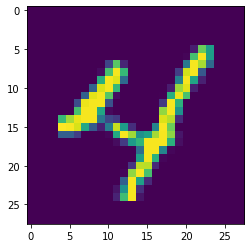

In [77]:
# ploting some data from the training dataset
plt.imshow(x_train[0]);
plt.show();

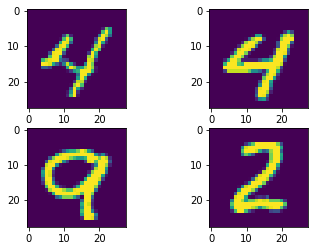

In [78]:
# viewing four images side by side
# 2 x 2 figure, 1 = first position
plt.subplot(221)
plt.imshow(x_train[0])
# 2 x 2 figure, 2 = second position
plt.subplot(222)
plt.imshow(x_train[1])
# 2 x 2 figure, 3 = third position
plt.subplot(223)
plt.imshow(x_train[2])
# 2 x 2 figure, 4 = fourth position
plt.subplot(224)
plt.imshow(x_train[3])
plt.show()

In [79]:
# discovering how many classes there are in the dataset
# by using set(array), it returns all values once
# Sets are used to store multiple items in a single variable.
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections


A common approach to addressing this problem from signal processing is called down sampling. This is where a lower resolution version of an input signal is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task.

In [80]:
# used to manipulate array values
import numpy 
# libraries used to build the neural network
from keras.models import Sequential
# mlp dense
from keras.layers import Dense
from keras.layers import Dropout
# to unify convolution layer with the mlp strong-conected layer
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
# method of pooling 
from keras.layers.convolutional import MaxPooling2D
# create classes 10, classes
from keras.utils import np_utils

In [81]:
# Redimensiona os dados para ficar no formato que o tensorflow trabalha
# it's interesting to resize the image (better to work with low resolution images)
# sequence of specified parameter
# number images,
# specifying that is 28x28, 
# 1 channel of the RGB (if it was colored, it would be 3)
# type is going to be float to better normalize the values 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [82]:
# normalizing the values of 0, 255 to 0, 1
# neural networks is going to work better within 0-1 interval
x_train = x_train / 255
x_validation /= 255
x_test /= 255

np_utils.to_categorical: This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

Example:

supossing the datas are distributed in this way:

[0 0 0 0 0 1 0 1] = [1]

[0 0 0 1 0 1 0 1] = [9]

[0 1 1 0 0 1 0 1] = [6]

by applying to_categorial, this would be change to:

[0 0 0 0 0 1 0 1] = [0 1 0 0 0 0 0 0 0 0]

[0 0 0 1 0 1 0 1] = [0 0 0 0 0 0 0 0 0 1]

[0 1 1 0 0 1 0 1] = [0 0 0 0 0 1 0 0 0 0]

In [83]:
print("before change to categorial: ", y_train[0])

# Converts a class vector (integers) to binary class matrix.
y_train = np_utils.to_categorical(y_train)
y_validation = np_utils.to_categorical(y_validation)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
print("Number of classes: ", num_classes) # from 0 to 9, 10 classes
print("after change to categorial: ", y_train[0])

before change to categorial:  4
Number of classes:  10
after change to categorial:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Model Parameters are the properties of training data that will learn on its own during training by the classifier or other ML model. For example, weights and biases, or split points in Decision Tree.

Model Hyperparameters are instead properties that govern the entire training process. They include variables which determines the network structure (for example, Number of Hidden Units) and the variables which determine how the network is trained (for example, Learning Rate). Model hyperparameters are set before training (before optimizing the weights and bias).
For example, here are some model inbuilt configuration variables :
* Learning Rate
* Number of Epochs
* Hidden Layers
* Hidden Units
* Activations Functions


Reference: https://medium.com/@jorgesleonel/hyperparameters-in-machine-deep-learning-ca69ad10b981

Model parameter = the model changes it automatically
hyperparameter = we control it



In [84]:
# construct the neural network
def baseline_model():
  # build a sequecial (sequencial of layers (it's a composition of layers))
  model = Sequential()
  # first layer of the neural network is going to be a convolution 2d
  # parameters in sequence:
  # 10 = how many neurons is going to be created (filters in the conv layer)
  # (3, 3) = each filter is 3 by 3
  # input_shape=(28, 28, 1) = input layer configuration (28 by 28 with only one channel)
  # activation='relu' = function of activation
  # those are called hyperparemeters
  model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
  # pooling 2 by 2
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # New conv layer added after first training where it had Cnn error 0.03 and Cnn accuracy 0.97
  model.add(Conv2D(50, (3, 3), activation='relu'))
  # pooling 2 by 2
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # only one convolution layer defined
  # flatten all data to pass the data to the mlp
  model.add(Flatten())
  # 10 neurons in the connected layer
  model.add(Dense(10, activation='relu'))
  # final layer of the neural network is the output layer
  # it must have num_classes neurons, with softmax activation function 
  model.add(Dense(num_classes, activation='softmax'))
  # compiling the neural network, optimizer = how the weights are going to be updated
  # loss = the type of problem, metrics = the metric used to avaliate the model using validation set
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

# loading the network
model = baseline_model()

In [85]:
# training neral network by using the function fit, parameter in sequence:
# training set, validation set, number of epochs, 
# batch_sise = how many data are used to verify the first generalization of the model. from
# each 200 images, the model is going to be checked (evaluate the weights from each 200 images)
model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=10, batch_size=200)

Epoch 1/10
150/150 [==============================] - 15s 100ms/step - loss: 0.9998 - accuracy: 0.6950 - val_loss: 0.3735 - val_accuracy: 0.8923
Epoch 2/10
150/150 [==============================] - 15s 99ms/step - loss: 0.2891 - accuracy: 0.9169 - val_loss: 0.2145 - val_accuracy: 0.9402
Epoch 3/10
150/150 [==============================] - 15s 99ms/step - loss: 0.1905 - accuracy: 0.9452 - val_loss: 0.1613 - val_accuracy: 0.9550
Epoch 4/10
150/150 [==============================] - 15s 99ms/step - loss: 0.1443 - accuracy: 0.9582 - val_loss: 0.1439 - val_accuracy: 0.9584
Epoch 5/10
150/150 [==============================] - 15s 99ms/step - loss: 0.1207 - accuracy: 0.9645 - val_loss: 0.1137 - val_accuracy: 0.9668
Epoch 6/10
150/150 [==============================] - 15s 99ms/step - loss: 0.1095 - accuracy: 0.9678 - val_loss: 0.1093 - val_accuracy: 0.9668
Epoch 7/10
150/150 [==============================] - 15s 102ms/step - loss: 0.0950 - accuracy: 0.9716 - val_loss: 0.0975 - val_accurac

In [86]:
# verify the model using the test dataset
# By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch. verbose=0 will show you nothing (silent)
scores = model.evaluate(x_test, y_test, verbose=0)
# 1 - scores[1] = error, scores[1] = accuracy
result_error = str("%.2f"%(1 - scores[1]))
result_accuracy = str("%.2f"%(scores[1]))
print("Cnn error", result_error)
print("Cnn accuracy", result_accuracy)

Cnn error 0.02
Cnn accuracy 0.98


To improve the neural network, we can improve the architecture of the neural network, add new layers, and so on